In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np
import pandas as pd

# ESTOS 2 IMPORT SE TIENEN QUE ELIMINAR (NO SE PUEDEN USAR)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
# generar dataset con comportamiento lineal
X, Y = make_regression(n_samples=100, n_features=1, noise=50)
data = pd.DataFrame({'Altura': X.flatten(), 'Peso': Y})

In [ ]:
# Algoritmo de regresion lineal

def getB(x, y, xm, ym):
  p1 = np.sum((x - xm) * (y - ym))
  p2 = np.sum((x - xm)**2)
  return p1/p2

def algoritmoLineal(a, b, x):
  y = a + b * x
  return y

xm = np.sum(data.Altura)/data.shape[0]
ym = np.sum(data.Peso)/data.shape[0]

b = getB(data.Altura, data.Peso, xm, ym)
a = ym - (b * xm)

In [ ]:
# Funciones para calcular los indices de error
def getMAE(y_true, y_pred):
  n = len(y_true)
  error_sum = 0
    
  for i in range(n):
    error_sum += abs(y_true[i] - y_pred[i])
        
  return error_sum / n
  #return mean_absolute_error(y_true, y_pred)

def getMSE(y_true, y_pred):
  n = len(y_true)
  error_sum = 0
    
  for i in range(n):
    error_sum += (y_true[i] - y_pred[i])**2
        
  return error_sum / n
  #return mean_squared_error(y_true, y_pred)

def getRMSE(y_actual, y_predicted):
  return np.sqrt(getMSE(y_actual, y_predicted))  

In [ ]:
# Obtenemos los indices de error de las observaciones
predictedY = []
xError = []
yError = []
for i in range(data.shape[0]):
  tempY = algoritmoLineal(a, b, data.Altura[i])
  predictedY.append(tempY)
  xError.extend([data.Altura[i], data.Altura[i]])
  yError.extend([data.Peso[i], tempY])

print("MAE: ", getMAE(data.Peso, predictedY))
print("MSE: ", getMSE(data.Peso, predictedY))
print("RMSE: ", getRMSE(data.Peso, predictedY))

MAE:  35.79602540405583
MSE:  1914.1433704142069
RMSE:  43.75092422354306


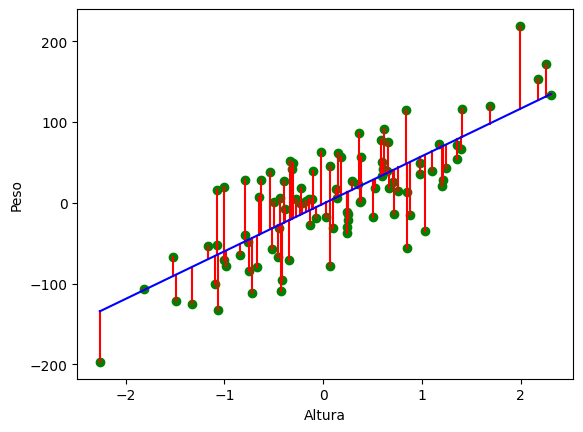

In [ ]:
# Graficamos las observaciones y sus errores
x = [data['Altura'].min(), data['Altura'].max()]
y = [algoritmoLineal(a, b, x[0]),algoritmoLineal(a, b, x[1])]
for i in range(0, len(xError), 2):
  pyplot.plot(xError[i:i+2], yError[i:i+2], 'r')
pyplot.plot(x, y, 'b')
pyplot.scatter(data['Altura'],data['Peso'], color='green')
pyplot.xlabel('Altura')
pyplot.ylabel('Peso')
pyplot.show()

Conclusiones

El MAE es la medida más simple y representa el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Es una medida de la magnitud del error promedio que se produce en las predicciones del modelo. El MAE de 35.796 indica que el modelo tiene un error promedio absoluto de alrededor de 36 unidades en sus predicciones.

El MSE es similar al MAE, pero se elevan al cuadrado las diferencias, lo que da más peso a los errores grandes. El MSE de 1914.14 indica que el modelo tiene un error cuadrático promedio de alrededor de 1914 unidades en sus predicciones.

El RMSE es la raíz cuadrada del MSE, lo que significa que tiene la misma unidad de medida que los datos originales. Se utiliza para evaluar qué tan cerca están las predicciones del modelo de los valores reales. El RMSE de 43.75 indica que el modelo tiene un error promedio de alrededor de 44 unidades en sus predicciones.

En general, cuanto más bajos sean estos valores, mejor será el rendimiento del modelo. En este caso, el MAE y el RMSE parecen ser relativamente altos, lo que sugiere que el modelo puede estar produciendo predicciones imprecisas.